In [2]:
# !pip install darts

In [3]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

c:\anaconda3\envs\projectM3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# 임의의 시계열 데이터 생성
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
data = np.array(data)
series = TimeSeries.from_values(values=data)

In [5]:
# 모델 생성 및 학습
model = ExponentialSmoothing(seasonal=None)  # 데이터가 부족해서 계절성을 비활성화
model.fit(series)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=None, seasonal_periods=None, random_state=0, kwargs=None)

In [6]:
# 예측 수행
prediction = model.predict(n=5)  # n=몇번예측인지

In [7]:
# 예측 결과 출력
print(prediction.values())

[[11.]
 [12.]
 [13.]
 [14.]
 [15.]]


In [8]:
# 주가 데이터 적용하기
data = pd.read_excel('../study_project/Data/Data_analysis/data/index_Infomation_v0.1.xlsx')

In [9]:
df = data[['Date', 'apple_Close']]
df

,Date,apple_Close
0,2014-01-02,19.754642
1,2014-01-03,19.320715
2,2014-01-04,19.320715
3,2014-01-05,19.320715
4,2014-01-06,19.426071
...,...,...
3828,2024-06-26,213.250000
3829,2024-06-27,214.100006
3830,2024-06-28,210.619995
3831,2024-06-29,210.619995


In [10]:
# 데이터 및 모델 세팅
series = TimeSeries.from_values(values=df['apple_Close'])
model = ExponentialSmoothing()
model.fit(series)

# 예측 수행
prediction = model.predict(n=90)  # n=몇번예측인지
print(prediction.values())

[[210.65655833]
 [210.79793816]
 [210.90546644]
 [211.01172634]
 [210.92094124]
 [211.01463565]
 [211.09321332]
 [211.08143379]
 [210.97687821]
 [211.23407863]
 [211.25599772]
 [211.21716083]
 [211.25476694]
 [211.39614677]
 [211.50367505]
 [211.60993495]
 [211.51914985]
 [211.61284425]
 [211.69142193]
 [211.6796424 ]
 [211.57508682]
 [211.83228724]
 [211.85420633]
 [211.81536944]
 [211.85297555]
 [211.99435538]
 [212.10188366]
 [212.20814356]
 [212.11735846]
 [212.21105286]
 [212.28963054]
 [212.277851  ]
 [212.17329543]
 [212.43049585]
 [212.45241494]
 [212.41357805]
 [212.45118416]
 [212.59256399]
 [212.70009227]
 [212.80635217]
 [212.71556706]
 [212.80926147]
 [212.88783915]
 [212.87605961]
 [212.77150404]
 [213.02870446]
 [213.05062355]
 [213.01178665]
 [213.04939277]
 [213.1907726 ]
 [213.29830088]
 [213.40456078]
 [213.31377567]
 [213.40747008]
 [213.48604776]
 [213.47426822]
 [213.36971265]
 [213.62691307]
 [213.64883216]
 [213.60999526]
 [213.64760138]
 [213.78898121]
 [213.89

In [11]:
prediction_values = []
for i in prediction.values():
    for j in i:
        prediction_values.append(j)
prediction_values

[210.6565583324782,
 210.79793816079976,
 210.9054664400492,
 211.01172633930636,
 210.9209412377066,
 211.0146356452396,
 211.0932133215612,
 211.08143378616916,
 210.97687821412813,
 211.23407863333028,
 211.2559977211585,
 211.2171608271689,
 211.2547669414761,
 211.39614676979767,
 211.5036750490471,
 211.60993494830427,
 211.5191498467045,
 211.61284425423753,
 211.6914219305591,
 211.67964239516706,
 211.57508682312604,
 211.8322872423282,
 211.85420633015642,
 211.8153694361668,
 211.852975550474,
 211.99435537879558,
 212.101883658045,
 212.20814355730218,
 212.1173584557024,
 212.2110528632354,
 212.289630539557,
 212.27785100416497,
 212.17329543212395,
 212.4304958513261,
 212.45241493915432,
 212.4135780451647,
 212.45118415947192,
 212.59256398779348,
 212.70009226704292,
 212.8063521663001,
 212.7155670647003,
 212.80926147223335,
 212.88783914855492,
 212.87605961316288,
 212.77150404112186,
 213.028704460324,
 213.05062354815223,
 213.01178665416262,
 213.04939276846983

In [12]:
predict_data = {
    'Date': pd.date_range(start='2024-07-01', periods=90, freq='D'),
    'predict_value': prediction_values
}

predict_df = pd.DataFrame(predict_data)
predict_df

,Date,predict_value
0,2024-07-01,210.656558
1,2024-07-02,210.797938
2,2024-07-03,210.905466
3,2024-07-04,211.011726
4,2024-07-05,210.920941
...,...,...
85,2024-09-24,214.985398
86,2024-09-25,215.092927
87,2024-09-26,215.199187
88,2024-09-27,215.108402


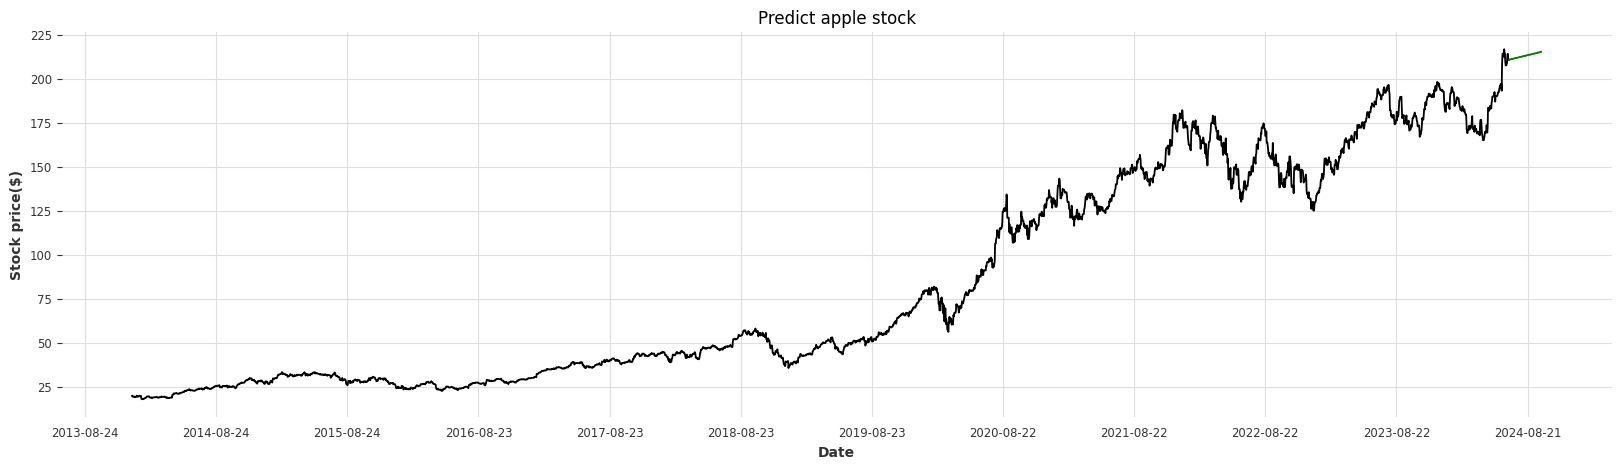

In [13]:
real_value = df['apple_Close']
real_date = df['Date']
predict_value = predict_df['predict_value']
predict_date = predict_df['Date']

# 'date' 컬럼을 datetime 형식으로 변환
real_date = pd.to_datetime(real_date)
predict_date = pd.to_datetime(predict_date)

# 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(real_date, real_value)
plt.plot(predict_date, predict_value, color='g')

# 날짜 형식 자동 설정
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# 그래프 제목 및 레이블 설정
plt.title('Predict apple stock')
plt.xlabel('Date')
plt.ylabel('Stock price($)')

plt.show()

In [14]:
# ExponentialSmoothing 모델 학습
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 전체 데이터 중 80%를 훈련데이터로, 20%를 테스트 데이터로 나누기
df.set_index('Date', inplace=True)
train_size = int(len(df) * 0.8)
train = df['apple_Close'][:train_size]
test = df['apple_Close'][train_size:]

In [15]:
train

Date
2014-01-02     19.754642
2014-01-03     19.320715
2014-01-04     19.320715
2014-01-05     19.320715
2014-01-06     19.426071
                 ...    
2022-05-21    137.589996
2022-05-22    137.589996
2022-05-23    143.110001
2022-05-24    140.360001
2022-05-25    140.520004
Name: apple_Close, Length: 3066, dtype: float64

In [16]:
# ExponentialSmoothing 모델 생성 및 훈련
model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [17]:
param_grid = {
    'trend': [None, 'add', 'mul'],  # 트렌드 옵션: 없음, 덧셈적, 곱셈적
    'seasonal': [None, 'add', 'mul'],  # 계절성 옵션: 없음, 덧셈적, 곱셈적
    'seasonal_periods': [4, 6, 8, 10, 12],  # 계절성 주기: 4에서 12까지의 다양한 주기
    'damped_trend': [True, False],  # 댐핑된 트렌드 사용 여부
    'use_boxcox': [True, False, 0.0, 0.5, 1.0],  # Box-Cox 변환 사용 여부 (False는 비사용, True는 자동 추정, 숫자는 람다 값)
    'initialization_method': ['estimated', 'heuristic', 'legacy-heuristic', 'known'],  # 초기화 방법
    # 'remove_bias': [True, False],  # 편향 제거 여부
    # 'smoothing_level': [None], #, 0.1, 0.2, 0.3, 0.4, 0.5],  # 평활 계수 (수동 설정 또는 자동 추정)
    # 'smoothing_slope': [None], #, 0.1, 0.2, 0.3, 0.4, 0.5],  # 기울기 평활 계수 (수동 설정 또는 자동 추정)
    # 'smoothing_seasonal': [None], #, 0.1, 0.2, 0.3, 0.4, 0.5],  # 계절성 평활 계수 (수동 설정 또는 자동 추정)
    # 'optimized': [True, False]  # 최적화 여부
}

# 최적의 하이퍼파라미터 초기화
best_score = float('inf')
best_params = None
best_model = None

In [18]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# 성능 결과 저장 리스트
results = []

# 그리드 서치 수행
for params in ParameterGrid(param_grid):
    try:
        model = ExponentialSmoothing(
            train,
            trend=params['trend'],
            seasonal=params['seasonal'],
            seasonal_periods=params['seasonal_periods'],
            damped_trend=params['damped_trend'],
            initialization_method=params['initialization_method']
        ).fit(
            # smoothing_level=params['smoothing_level'],
            # smoothing_slope=params['smoothing_slope'],
            # smoothing_seasonal=params['smoothing_seasonal'],
            # optimized=params['optimized'],
            # use_boxcox=params['use_boxcox'],
            # remove_bias=params['remove_bias']
        )

        predictions = model.forecast(len(test))
        mse = mean_squared_error(test, predictions)  # 제곱 오차의 평균. 값이 낮을수록 모델의 성능이 좋음. 큰 오차에 대해 더 큰 페널티를 부과
        mae = mean_absolute_error(test, predictions)  # 절대 오차의 평균. 오차의 크기를 그대로 반영. 모든 오차를 동일하게 고려
        mape = mean_absolute_percentage_error(test, predictions)  # 값이 낮을수록 예측이 실제 값에 가깝다는 의미. 예측 오차의 백분율을 기준으로 평가. 데이터의 스케일에 영향을 받지 않음
        r2 = r2_score(test, predictions)  # 예측된 값이 실제 값을 얼마나 잘 설명하는지. 1에 가까울수록 모델이 데이터를 잘 설명
        
        # MSE를 기준으로 최적의 모델 선택
        if mse < best_score:
            best_score = mse
            best_params = params
            best_model = model
            best_metrics = {
                'MSE': mse,
                'MAE': mae,
                'MAPE': mape,
                'R²': r2
            }
        
        # 결과 저장
        results.append({
            'trend': params['trend'],
            'seasonal': params['seasonal'],
            'seasonal_periods': params['seasonal_periods'],
            'damped_trend': params['damped_trend'],
            'use_boxcox': params['use_boxcox'],
            'initialization_method': params['initialization_method'],
            # 'remove_bias': params['remove_bias'],
            # 'smoothing_level': params['smoothing_level'],
            # 'smoothing_slope': params['smoothing_slope'],
            # 'smoothing_seasonal': params['smoothing_seasonal'],
            # 'optimized': params['optimized'],
            'MSE': mse,
            'MAE': mae,
            'MAPE': mape,
            'R²': r2
        })

    except Exception as e:
        print(f"Error with parameters {params}: {e}")

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the tre

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the tre

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the tre

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 1.0}: Can only dampen th

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': None, 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 1.0}: Can only dampen th

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen th

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 1.0}: Can only dampen th

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 1.0}: Can only dampen th

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 1.0}: Can only damp

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'add', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 1.0}: Can only damp

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen th

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 6, 'trend': None, 'use_boxcox': 1.0}: Can only dampen th

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 8, 'trend': None, 'use_boxcox': 1.0}: Can only dampen th

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 10, 'trend': None, 'use_boxcox': 1.0}: Can only damp

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'legacy-heuristic', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': None, 'use_boxcox': 1.0}: Can only damp

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component
Error with parameters {'damped_trend': Tru

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': 'add', 'use_boxcox': True}: initialization is 'known' but initial_level not given
Error with paramet

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: Can only dampen the trend component
Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'mul', 'seasonal_periods': 4, 'trend': 'add', 'use_boxcox': True}: initialization is 'known' but initial_level not given
Error with paramet

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': True, 'initialization_method': 'known', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': 'mul', 'use_boxcox': 1.0}: initialization is 'known' but initial_level not given


c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
c:\anaconda3\

Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': True}: initialization is 'known' but initial_level not given
Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': False}: initialization is 'known' but initial_level not given
Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.0}: initialization is 'known' but initial_level not given
Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 0.5}: initialization is 'known' but initial_level not given
Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': None, 'seasonal_periods': 4, 'trend': None, 'use_boxcox': 1.0}: i

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': 'add', 'use_boxcox': False}: initialization is 'known' but initial_level not given
Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': 'add', 'use_boxcox': 0.0}: initialization is 'known' but initial_level not given
Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': 'add', 'use_boxcox': 0.5}: initialization is 'known' but initial_level not given
Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': 'add', 'use_boxcox': 1.0}: initialization is 'known' but initial_level not given
Error with parameters {'damped_trend': False, 'initialization_method': 'known', 'seasonal': 'add', 'seasonal_periods': 4, 'trend': 'mul', 'use_boxcox'

c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\anaconda3\envs\projectM3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will b

In [23]:
# 결과 출력
print("Best Parameters:", best_params)
print("Best MSE:", best_score)
print("Best Metrics:", best_metrics)

Best Parameters: {'damped_trend': False, 'initialization_method': 'estimated', 'seasonal': 'mul', 'seasonal_periods': 12, 'trend': 'mul', 'use_boxcox': True}
Best MSE: 160.4392896985213
Best Metrics: {'MSE': 160.4392896985213, 'MAE': 10.2624418709874, 'MAPE': 0.06178195774225986, 'R²': 0.6012046053981406}


In [29]:
# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)
results_df.to_excel('./data/ES_results_df.xlsx')
results_df

,trend,seasonal,seasonal_periods,damped_trend,use_boxcox,initialization_method,MSE,MAE,MAPE,R²
0,add,None,4,True,True,estimated,1466.158443,32.706540,0.182642,-2.644352
1,add,None,4,True,False,estimated,1466.158443,32.706540,0.182642,-2.644352
2,add,None,4,True,0.0,estimated,1466.158443,32.706540,0.182642,-2.644352
3,add,None,4,True,0.5,estimated,1466.158443,32.706540,0.182642,-2.644352
4,add,None,4,True,1.0,estimated,1466.158443,32.706540,0.182642,-2.644352
...,...,...,...,...,...,...,...,...,...,...
1120,mul,mul,12,False,True,legacy-heuristic,1896.699021,35.694074,0.207606,-3.714524
1121,mul,mul,12,False,False,legacy-heuristic,1896.699021,35.694074,0.207606,-3.714524
1122,mul,mul,12,False,0.0,legacy-heuristic,1896.699021,35.694074,0.207606,-3.714524
1123,mul,mul,12,False,0.5,legacy-heuristic,1896.699021,35.694074,0.207606,-3.714524


In [ ]:
# 꺽은선


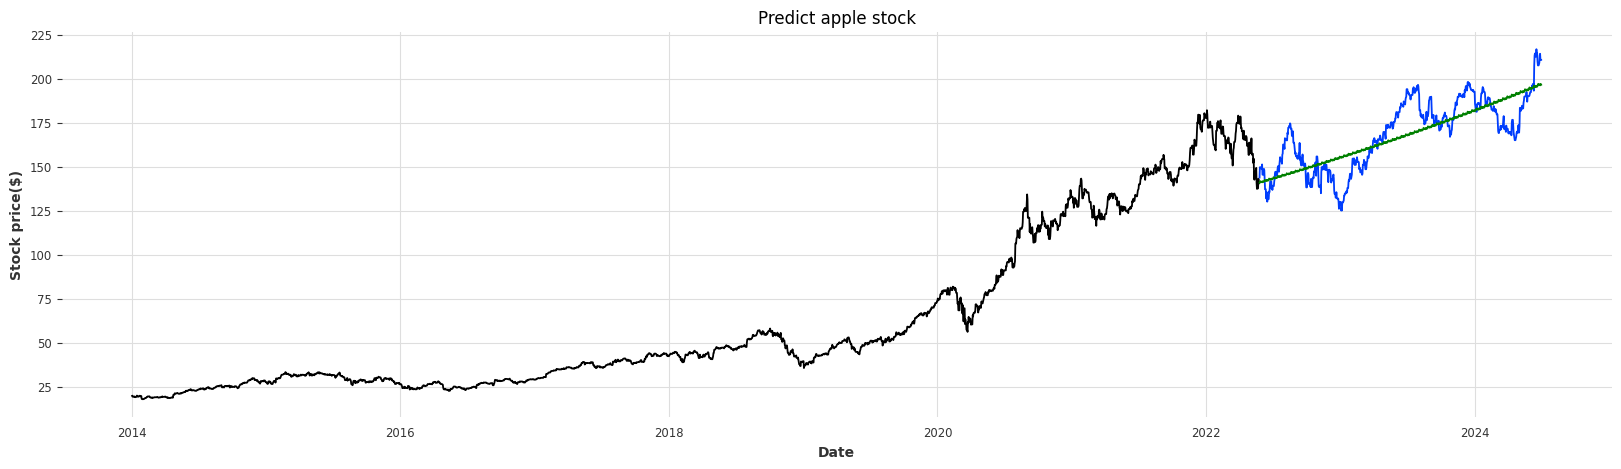

In [25]:
# 최적 모델을 사용한 예측 시각화

# 인덱스 데이터타입 변경
train.index = pd.to_datetime(train.index)
test.index =  pd.to_datetime(test.index)

# 그래프 그리기
plt.figure(figsize=(20, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, best_model.forecast(len(test)), label='Forecast', color='g')

# 그래프 제목 및 레이블 설정
plt.title('Predict apple stock')
plt.xlabel('Date')
plt.ylabel('Stock price($)')

plt.show()

In [28]:
import pickle

# 모델 저장
with open('./data/pastGraphRegression_apple_exponentialSmoothing.pkl', 'wb') as file:
    pickle.dump(model, file)